# MES Experimental Analysis
This file contains all the experimental analysis required to prove the worth and place of the proposed cryptosystem, among the already existing pool

## Block Size vs Runtime

In [1]:
import numpy as np
import sympy
from sympy import prime
from sympy.ntheory.modular import crt
import random
import time
from matplotlib import pyplot as plt
%matplotlib inline

## Cantor Pairing Function
This function takes in a point $(x,y)$ and converts to a single number $t$ and vice versa

In [2]:
def cantor_pair(k1, k2, safe=True):
    z = int(0.5 * (k1 + k2) * (k1 + k2 + 1) + k2)
    if safe and (k1, k2) != cantor_unpair(z):
        raise ValueError("{} and {} cannot be paired".format(k1, k2))
    return z

def cantor_unpair(z):
    w = np.floor((np.sqrt(8 * z + 1) - 1) / 2)
    t = (w**2 + w) / 2
    y = int(z - t)
    x = int(w - y)
    # assert z != pair(x, y, safe=False):
    return (x, y)

A padding function is required since we are applying a block cipher technique here

In [3]:
def padding(plain_text,block_size):
    plain_text += '0'*(block_size-len(plain_text))
    return plain_text

def chunkstring(string, length):
    return list(string[0+i:length+i] for i in range(0, len(string), length))

def reduced_ascii_chunks(ascii_chunks):
    cantor_reduced_list = []
    for i in range(0,len(ascii_chunks)-1,2):
        cantor_reduced_list.append(cantor_pair(ascii_chunks[i],ascii_chunks[i+1]))
    return cantor_reduced_list

In [4]:
def encrypt_decrypt(plain_text,block_size):
    t1 = time.time()
    n = len(plain_text)
    
    plain_text_chunks = []
    if n < block_size:
        plain_text_chunks.append(padding(plain_text,block_size))
    else:
        chunks = chunkstring(plain_text,block_size)
        for i in range(len(chunks)):
            plain_text_chunks.append(padding(chunks[i],block_size))

    ascii_chunks = []
    for chunk in plain_text_chunks:
        t = []
        for i in chunk:
            t.append(ord(i))
        ascii_chunks.append(t)

    cantor_reduced_list = []
    for chunk in ascii_chunks:
        cantor_reduced_list.append(reduced_ascii_chunks(chunk))
        
    M = []
    for i in range(1,block_size//2+1):
        M.append(sympy.ntheory.generate.nextprime(33024,ith=i))

    random.shuffle(M)
    
    # print('Private key generated : ',end='')
    # print(M)

    # Applying the Chinese Remainder Theorem to get X

    cipher_text = []
    for chunk in cantor_reduced_list:
        x = crt(M,chunk)
        cipher_text.append(round(x[0]))
    # print('Encrypted Cipher Text : ',cipher_text)


    # ---------------------------------DECRYPTION-----------------------------------
    # private_key - known
    # cipher_text - known
    # block_size  - known


    dec_M = M

    dec_cantor_reduced_list = []
    for x in cipher_text:
        t = []
        for mi in dec_M:
            t.append(x%mi)
        dec_cantor_reduced_list.append(t)
    # print(dec_cantor_reduced_list)

    decrypted_ascii_list = []
    for chunk in dec_cantor_reduced_list:
        t = []
        for i in range(len(chunk)):
            x,y = cantor_unpair(chunk[i])
            t.append(x)
            t.append(y)
        decrypted_ascii_list.append(t)
    
    decrypted_text_list = []
    for chunk in decrypted_ascii_list:
        for i in chunk:
            if chr(i)!='0':
                decrypted_text_list.append(chr(i))
    # print('Decrypted Text : ',end='')
    # print(''.join(map(lambda x:str(x),decrypted_text_list)))
    return time.time()-t1

We define a custom string for testing purposes

In [5]:
# plain_text = "Hello Fawlty Towers, how are you, its nice day"
plain_text = 'abcdefghijklmnopqrstuvwxyz'*1000

In [6]:
t_lst = []
for i in range(2, 257):
    block_size = i
    time_taken = encrypt_decrypt(plain_text, block_size)
    t_lst.append(time_taken)
    print('Block_size:'+str(i)+"  --------  Time:"+str(time_taken))


Block_size:2  --------  Time:0.2827491760253906
Block_size:3  --------  Time:0.17145252227783203
Block_size:4  --------  Time:0.2565743923187256
Block_size:5  --------  Time:0.2515246868133545
Block_size:6  --------  Time:0.25522947311401367
Block_size:7  --------  Time:0.21376943588256836
Block_size:8  --------  Time:0.25554609298706055
Block_size:9  --------  Time:0.21807575225830078
Block_size:10  --------  Time:0.19585418701171875
Block_size:11  --------  Time:0.2108004093170166
Block_size:12  --------  Time:0.29930758476257324
Block_size:13  --------  Time:0.22279596328735352
Block_size:14  --------  Time:0.24603033065795898
Block_size:15  --------  Time:0.2429046630859375
Block_size:16  --------  Time:0.25205302238464355
Block_size:17  --------  Time:0.2276771068572998
Block_size:18  --------  Time:0.24445843696594238
Block_size:19  --------  Time:0.22111225128173828
Block_size:20  --------  Time:0.2462291717529297
Block_size:21  --------  Time:0.2268810272216797
Block_size:22  -

Block_size:167  --------  Time:0.296633243560791
Block_size:168  --------  Time:0.3503389358520508
Block_size:169  --------  Time:0.3492908477783203
Block_size:170  --------  Time:0.35084104537963867
Block_size:171  --------  Time:0.3482992649078369
Block_size:172  --------  Time:0.32567477226257324
Block_size:173  --------  Time:0.30245041847229004
Block_size:174  --------  Time:0.3529336452484131
Block_size:175  --------  Time:0.35012054443359375
Block_size:176  --------  Time:0.4246213436126709
Block_size:177  --------  Time:0.3547794818878174
Block_size:178  --------  Time:0.2957730293273926
Block_size:179  --------  Time:0.33412885665893555
Block_size:180  --------  Time:0.3628509044647217
Block_size:181  --------  Time:0.35712766647338867
Block_size:182  --------  Time:0.37511587142944336
Block_size:183  --------  Time:0.37569451332092285
Block_size:184  --------  Time:0.28821682929992676
Block_size:185  --------  Time:0.36658143997192383
Block_size:186  --------  Time:0.38764953

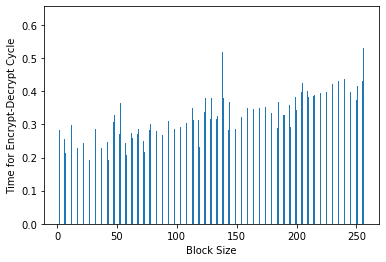

In [7]:
x = np.arange(2,257)  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
# Set position of bar on X axis
plt.bar(x, t_lst, width=width)
plt.xlabel('Block Size')
plt.ylabel('Time for Encrypt-Decrypt Cycle')
plt.show()

Curve Parameter (a,b) =  [0.00079636 0.22179694]


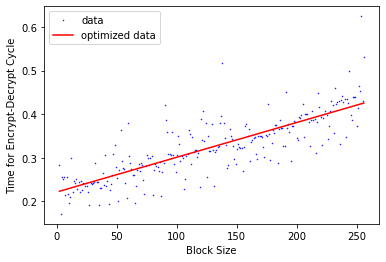

In [8]:
from scipy import optimize

def test_func(x, a, b):
    return x*a+b 

param, param_cov = optimize.curve_fit(test_func, x, t_lst)
print('Curve Parameter (a,b) = ',param)
ans = (param[0]*x+param[1]) 
  
plt.plot(x, t_lst,'.', color ='blue', label ="data",markersize=1) 
plt.plot(x, ans, '-', color ='red', label ="optimized data") 
plt.xlabel('Block Size')
plt.ylabel('Time for Encrypt-Decrypt Cycle')
plt.legend() 
plt.show() 

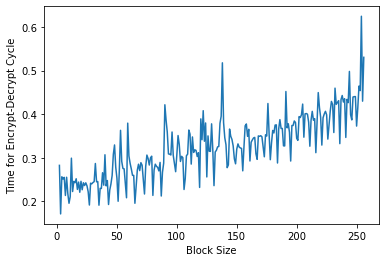

In [9]:
plt.plot(x, t_lst)
plt.xlabel('Block Size')
plt.ylabel('Time for Encrypt-Decrypt Cycle')
plt.show()